In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.style.use('seaborn')

In [2]:
#Traing data reading from csv file
dfx=pd.read_csv("../Downloads/Logistic_X_Train.csv")
dfy=pd.read_csv("../Downloads/Logistic_Y_train.csv")
x=dfx.values
y=dfy.values
#x.reshape(3,-1)
#y.reshape(1,-1)
#print([0:6])
x=x[:,:]
print(x.shape)
#print(y[0:100])

(3000, 3)


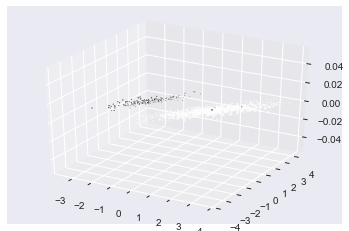

In [35]:
fig=plt.figure()
ax=fig.gca(projection='3d')
plt.scatter(x[:,0],x[:,1],x[:,2],c=y[:,0],label='y')

#ax.legend()
plt.show()

In [4]:
#hypothesis function
def hypo(x,w,b):           #hypthesis=1/1+(e**-z); where z is hypothesis of multiple regression
    z=np.dot(w,(x.T))+b     
    return sigmoid(z)

In [5]:
def sigmoid(h):
    return 1.0/(1.0 + np.exp(-1.0*h)) 

In [6]:
def error(x,y,w,b) :        #error function or cost function which is summetion_of (y[i]*log2(hx)-(1-y)*log2(1-hx))
    m=x.shape[0]           # where hx is hypothesis corresponding to the ith row 
    e=0.0                  # for adding error 
    for i in range(m):
        hx=hypo(x[i],w,b)
        if(hx>=1 or hx==0):
            print(hx,"i  ",i)
        if(hx!=0 or hx!=1):
            e=e+(y[i][0]*np.log2(hx)-(1.0-y[i][0])*np.log2(1-hx))
    return e    

In [7]:
def gredient(x,y,w,b):
    grad=np.array([0.0,0.0,0.0,0.0])    # else we can use :- grad=np.zeros(4)
    m=x.shape[0]
    for i in range(m):
        hx=hypo(x[i],w,b)
        grad[0]+=(-hx+y[i][0])
        grad[1]+=(-hx+y[i][0])*x[i][0]
        grad[2]+=(-hx+y[i][0])*x[i][1]
        grad[3]+=(-hx+y[i][0])*x[i][2]
    return grad/m 

In [25]:
def GradientDescent(x,y,learning_rate=.00031):
    #w=np.random.random(3)
    w=np.array([0.21,0.01,0.5])
    b=0.01
    theta_list=[]
    err_list=[]
    max_itr=1000
    for i in range(max_itr):
        g=gredient(x,y,w,b)
        e=error(x,y,w,b)
        theta_list.append(w)
        err_list.append(e)
        b=b+learning_rate*(g[0])
        w[0]=w[0]+learning_rate*(g[1])
        w[1]=w[1]+learning_rate*(g[2])
        w[2]=w[2]+learning_rate*(g[3])
    return  w,b,err_list,theta_list    

In [26]:
cofficient,intercept, error_list,theta_list = GradientDescent(x,y)  

In [27]:
def predict(x,w,b):
    confidence = hypo(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1

In [28]:
print(cofficient)
print(intercept)

[ 0.00775366 -0.00489653  0.29624029]
0.007581200607469648


In [29]:
df_t=pd.read_csv("../Downloads/Logistic_X_Test.csv")
t=df_t.values
print(t.shape)

(1000, 3)


In [32]:
k=df_t.shape[0]
output=[]
for i in range(k):
    output.append(predict(t[i],cofficient,intercept))
df_t.to_csv('Chemical Segregation.csv')    
    
    

[ 0.00775366 -0.00489653  0.29624029]


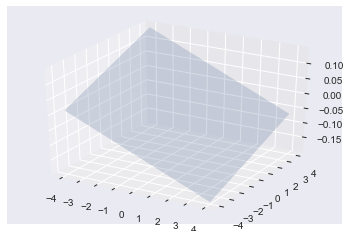

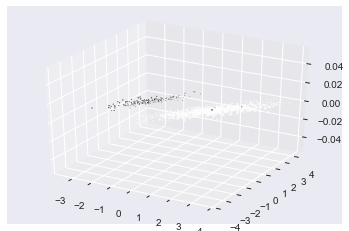

In [34]:
print(cofficient)


xx, yy = np.meshgrid(range(-4,5), range(-4,5))
z = (-cofficient[0] * xx - cofficient[1] * yy - intercept) * 1. /cofficient[2]
plt3d = plt.figure().gca(projection='3d')

#ax.hold(True)
# and plot the point 
#ax.scatter(point2[0] , point2[1] , point2[2],  color='green')
fig=plt.figure()
ax=fig.gca(projection='3d')
plt.scatter(x[:,0],x[:,1],x[:,2],c=y[:,0],label='y')

#ax.legend()
plt3d.plot_surface(xx, yy, z, alpha=0.2)

# Ensure that the next plot doesn't overwrite the first plot
ax = plt.gca()

